In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/MyDrive/Colab/28 Case Study: Netflix Dataset'

/content/drive/MyDrive/Colab/28 Case Study: Netflix Dataset


## Shape of the dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv("netflix_dataset.csv")

print(df.shape)

(7787, 12)


## Describe the dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv("netflix_dataset.csv")

print(df.describe())

## Datatype of each column

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv("netflix_dataset.csv")

print(df.dtypes)

## Numer of NA values in each column

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv("netflix_dataset.csv")

print(df.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


## Remove NA values

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv("netflix_dataset.csv")

df.cast.fillna('No Data', inplace = True)
df.director.fillna('No Data', inplace = True)

df.country.fillna(df.country.mode()[0], inplace = True)
df.date_added.fillna(df.date_added.mode()[0], inplace = True)
df.rating.fillna(df.rating.mode()[0], inplace = True)

print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [ ]:
df.rating.mode()

0    TV-MA
Name: rating, dtype: object

## Percentage of TV shows and Movies

(69.1, 30.9)


<Axes: ylabel='type'>

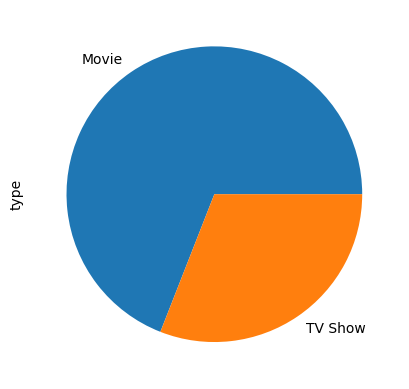

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv("netflix_dataset.csv")

type_counts = df.type.value_counts()

movie_pct = (type_counts.Movie/type_counts.sum())*100
tv_show_pct = 100 - movie_pct

type_pct = (round(movie_pct,1), round(tv_show_pct, 1))

print(type_pct)

type_counts.plot.pie()

In [ ]:
df.type.value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

## Top 10 countries

In [ ]:
df.country.value_counts()

United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

('United States', 2555)


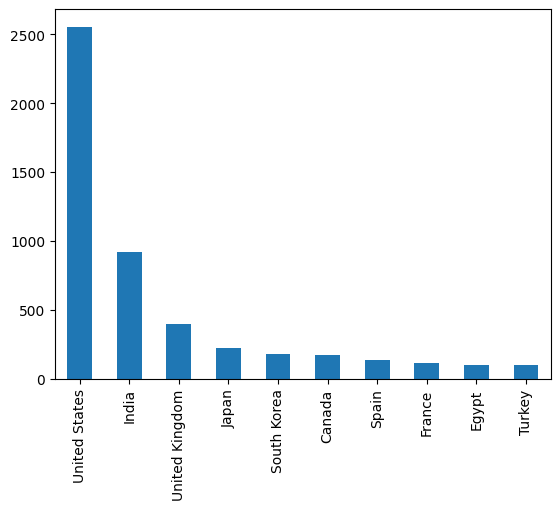

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv("netflix_dataset.csv")

countries = df.country.value_counts()

countries.head(10).plot.bar(x = countries.index, y = countries)

country_shows = (countries.index[0], countries[0])

print(country_shows)

## Content Added Over Years

2019


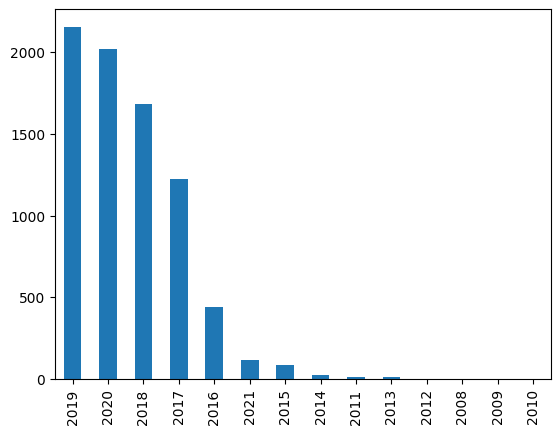

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv("netflix_dataset.csv")

df.date_added.fillna(df.date_added.mode()[0], inplace = True)

df['year_added'] = pd.DatetimeIndex(df['date_added']).year

df['year_added'].astype(dtype = 'int')

year_added_count = df.year_added.value_counts()

year_added_count.plot.bar()

print(year_added_count.index[0])

## Most Popular in India

Given File 'netflix_dataset.csv'

Problem Statement:

Find the most popular type of content in India. This popularity should be measured on two parameters:

1. What type of content is more popular, Movies or TV shows? (Plot Piechart to find this)

2. What type of rating is more popular. If it's teens or adults or kids. (Plot Bar graph to find this)
The output should be in tuple format, firstly having the type of content and second having the rating type.

Output Format:

(<Content Type>, <Rating Type>)

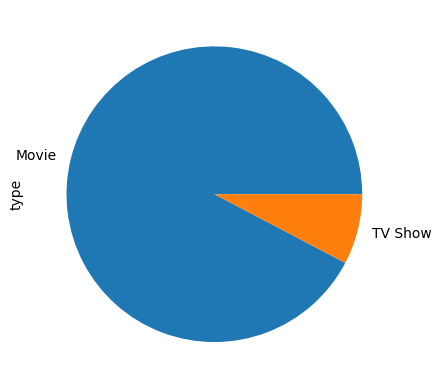

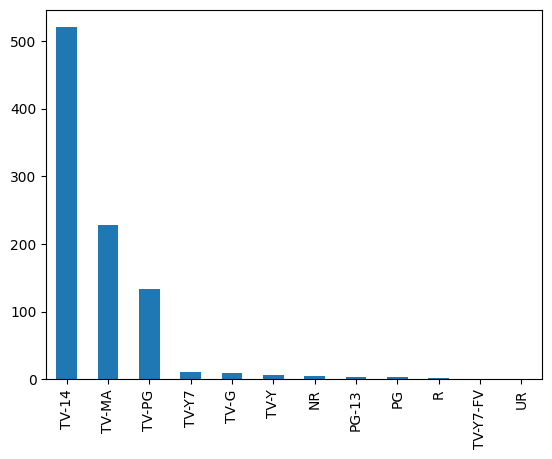

('Movie', 'TV-14')


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv("netflix_dataset.csv")

nflix_india = df[df.country == 'India']

india_type = nflix_india.type.value_counts()
india_rating = nflix_india.rating.value_counts()

india_type.plot.pie()
plt.show()
india_rating.plot.bar()
plt.show()

type_rating = (india_type.index[0], india_rating.index[0])

print(type_rating)

## Longest Movie Duration

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv("netflix_dataset.csv")

#filtering movies
movies = df[df.type == 'Movie'].copy()

#extracting number of minutes from duration column
movies['minutes'] = movies['duration'].str.extract('(\d+)').astype(int)

#sorting dataset by number of minutes
movies.sort_values(by = 'minutes', ascending = False, inplace = True)

movies.reset_index(inplace = True)

#storing title and release year of longest movie
longest_movie = movies.title[0]
release_year = movies.release_year[0]

tuple = (longest_movie, release_year)

print(tuple)

('Black Mirror: Bandersnatch', 2018)
